<a href="https://colab.research.google.com/github/ThierryBeaulieu/MachineLearning/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network From Scratch In Python

### Step 1: Download MNIST images


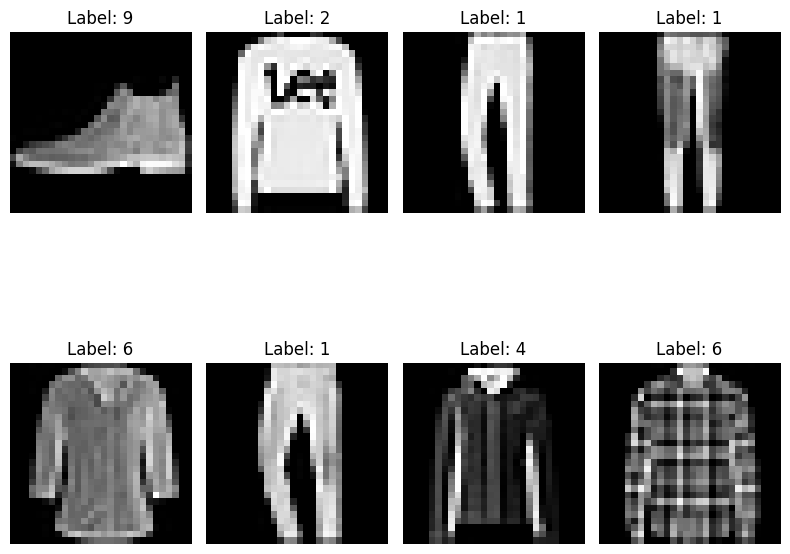

In [22]:
# Pasted from Geeks for Geek
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformation
transform = transforms.ToTensor()

# Load the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create a subplot with 4x4 grid
fig, axs = plt.subplots(2, 4, figsize=(8, 8))

# Loop through each subplot and plot an image
for i in range(2):
    for j in range(4):
        image, label = train_dataset[i * 4 + j]  # Get image and label
        image_numpy = image.numpy().squeeze()    # Convert image tensor to numpy array
        axs[i, j].imshow(image_numpy, cmap='gray')  # Plot the image
        axs[i, j].axis('off')  # Turn off axis
        axs[i, j].set_title(f"Label: {label}")  # Set title with label

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [24]:
len(train_dataset) # 60000 images
len(test_dataset) # 10000 images

10000

In [41]:
test_image = train_dataset[0][0]
print(test_image.shape)

torch.Size([1, 28, 28])


### Step 2: Create a model



In [ ]:
class LinearModel:
  def __init__(self):
    pass

  def printSomething():
    print("hello")


### Step 3: Train the model

### Step 4: Execute the model